<img src="Auswahl_2015-11-27_001.png"/>

<pre style="text-align: right">
Gruppe:             
                MeSi
Autoren:            
Jens Meiners
Arne Siebenmorgen
</pre>

<img src="Auswahl_2015-11-27_002.png"/>

In [90]:
# prepare data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
%matplotlib inline

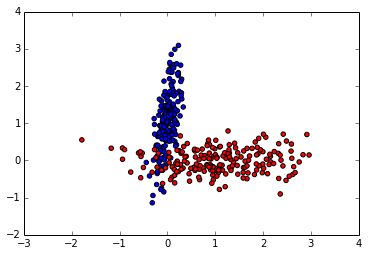

In [101]:
cov1 = [[0.1, 0.7], 
       [0, 0.1]]
cov2 = [[0.7, 0], 
       [0.1, 0.1]]

mean1 = [0. , 1.]
mean2 = [1. , 0.]

X1,y1 = np.random.multivariate_normal(mean1, cov1, 200).T
X2,y2 = np.random.multivariate_normal(mean2, cov2, 200).T

plt.scatter(X1, y1, c='blue')
plt.scatter(X2, y2, c='red')
plt.show()

In [102]:
from sklearn.lda import LDA

In [111]:
X = np.vstack((np.hstack((X1,X2)),np.hstack((y1,y2)))).T
y = np.ones(X.shape[0])
y[:X.shape[0]/2] *= -1

lda = LDA(n_components=2)
X_lda = lda.fit_transform(X,y)

print 'weights:\n',lda.coef_
print 'b:\n',lda.intercept_

weights:
[[-1.2570399]
 [ 1.2570399]]
b:
[-1.48322184 -1.48322184]


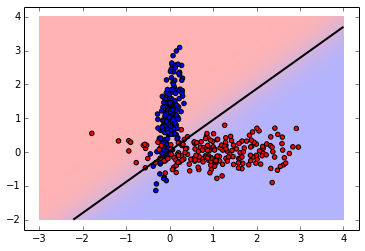

In [107]:
def plot_fisher(model):
    cmap = colors.LinearSegmentedColormap(
        'red_blue_classes',
        {'blue': [(0, 0.7, 0.7), (1, 1, 1)],
         'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
         'red': [(0, 1, 1), (1, 0.7, 0.7)]})
    plt.cm.register_cmap(cmap=cmap)

    plt.scatter(X1, y1, c='blue')
    plt.scatter(X2, y2, c='red')

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.))
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

    plt.scatter(X1, y1, c='blue')
    plt.scatter(X2, y2, c='red')

    plt.show()
plot_fisher(lda)

LDA can only learn linear boundries. quadratic lda is more flexible, see the next example

In [106]:
from sklearn.qda import QDA

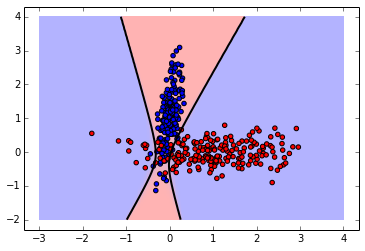

In [110]:
qda = QDA()
qda.fit(X,y)

plot_fisher(qda)

We have seen that LDA yields good results for equal covariances. As the example above showed, this may not hold true if the covariances differ. QDA was proposed as a model to induce more flexibility to LDA.

<img src="Auswahl_2015-11-27_003.png"/>

<img src="Auswahl_2015-11-27_004.png"/>

<img src="Auswahl_2015-11-27_005.png"/>

<img src="Auswahl_2015-11-27_006.png"/>

<img src="Auswahl_2015-11-27_007.png"/>

<img src="Auswahl_2015-11-27_008.png"/>

<img src="Auswahl_2015-11-27_009.png"/>

<img src="Auswahl_2015-11-27_015.png"/>

<img src="Auswahl_2015-11-27_011.png"/>

<img src="Auswahl_2015-11-27_012.png"/>

<img src="Auswahl_2015-11-27_013.png"/>

<img src="Auswahl_2015-11-27_014.png"/>